In [1]:
#%matplotlib inline

import pylab

import xml.etree.ElementTree as ET
import json
import os
import pandas as pd
import re
import numpy as np
import itertools


# Visualization
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-white')

pylab.ion()

<h1> Read HEPRECORDS and HEPNAMES </h1>

Read HEPRECORDS.json and HEPNAMES.json. In both case the 'item' entry is in integer format. Turn it to unicode, as this is the format in other part of the table.

In [2]:
df=pd.read_json('./files/HEPRECORDS.json')
data=df.copy()

In [3]:
data.sort_index(inplace=True)
data.item = data.item.astype(unicode)
data['cat']=data['cat'].apply(lambda x: x.lower().replace("arxiv:", ""))

In [4]:
df_names=pd.read_json('./files/HEPNAMES.json')
data_names=df_names.copy()

In [5]:
data_names.sort_index(inplace=True)
data_names.item = data_names.item.astype(unicode)

Show some example

In [6]:
print 'Number of entries in HEPRECORDS:', data.shape[0]
print 'Number of entries in HEPNAMES:', data_names.shape[0]

Number of entries in HEPRECORDS: 1227647
Number of entries in HEPNAMES: 118502


In [21]:
data.iloc[1182323:118237]

,authors,cat,item,refs,title,year
1513394,[981939],0,1477638,"[213013, 207031, 140268, 33698, 285746, 110115...",Higher-Dimensional Theories with continuous or...,2016
1513395,[],0,1477639,[],Cross sections and thermonuclear reaction rate...,2016
1513396,[],0,1477641,"[525434, 1462005, 662496, 664544, 763009, 8207...",Excited Nuclear States for Mg-24 (Magnesium),2016
1513397,[],0,1477642,"[212450, 1454599, 1437654, 79630, 1434162, 144...","Neutron Yield of the Reaction (α, n) on Thick ...",2016


In [24]:
data_names.iloc[5323:5327]

,author,item
5323,"Stoffel, Franziskus",987463
5324,"Stoeger, William R.",987464
5325,"Stoeffl, Wolfgang",987465
5326,"Stoeffhaas, Ed",987466


In [ ]:
data[data]

## Some exploration of categories

In [25]:
dict_cat  = dict(data['cat'].value_counts())
cat_count_sorted = sorted(dict_cat.items(), key=lambda x: x[1], reverse = True)

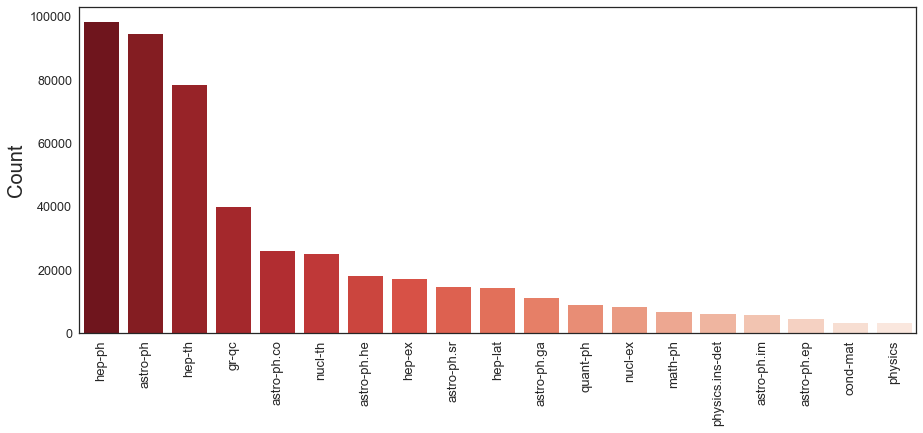

In [26]:
temp = pd.DataFrame(cat_count_sorted[1:20])
sns.set()
sns.set(font_scale = 1.25)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,6))
gen_plot = sns.barplot( x = 0, y = 1, data = temp,label='small', palette=sns.color_palette("Reds_r",20))
gen_plot.set_xticklabels(temp[0].values, rotation=90, fontsize=13)
gen_plot.set_xlabel("")
gen_plot.set_ylabel("Count", fontsize=20)
plt.show()

Papers published per year

In [27]:
inspire_byyear = dict(data['year'].value_counts())
inspire_byyear =[(k, v) for k, v in inspire_byyear.iteritems()]

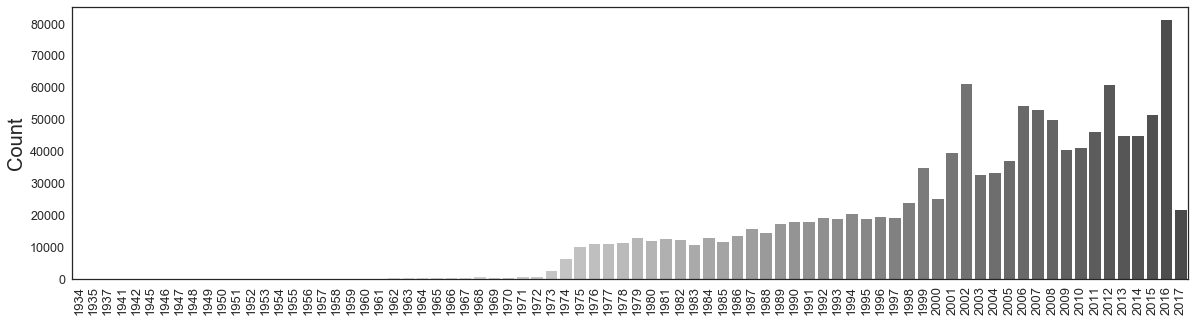

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set()
sns.set(font_scale = 1.25)
sns.set_style("white")
temp = pd.DataFrame(inspire_byyear)
gen_plot = sns.barplot( x = 0, y = 1, data = temp,label='small', palette=sns.color_palette("Greys",100))
gen_plot.set_xticklabels(temp[0].values, rotation=90, fontsize=13)
gen_plot.set_xlabel("")
gen_plot.set_ylabel("Count", fontsize=20)
plt.show()

Look at hep-th and hep-ph three biggest arXiv categories

In [29]:
hepph_byyear = dict(data[(data['cat']=='hep-ph')]['year'].value_counts())
hepth_byyear = dict(data[(data['cat']=='hep-th')]['year'].value_counts())
hepex_byyear = dict(data[(data['cat']=='hep-ex')]['year'].value_counts())
arxiv_range = range(1992,2018)

In [30]:
# Values of each group
bars_hepph = np.array([hepph_byyear[_] for _ in arxiv_range])
bars_hepth = np.array( [hepth_byyear[_] for _ in arxiv_range])
bars_hepex = np.array( [hepex_byyear[_] for _ in arxiv_range])

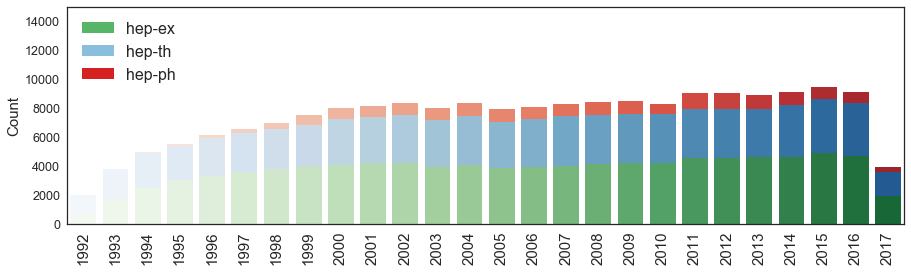

In [31]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set()
sns.set(font_scale = 1.2)
sns.set_style("white")

plt3 =  sns.barplot(x = arxiv_range, y =  bars_hepph+bars_hepth+bars_hepex, palette=sns.color_palette("Reds",30))
plt2 =  sns.barplot(x = arxiv_range, y =  bars_hepph+bars_hepth, palette=sns.color_palette("Blues",30))
plt1 =  sns.barplot(x = arxiv_range, y =  bars_hepph, palette=sns.color_palette("Greens",30))

topbar = plt.Rectangle((0,0),1,1,fc=u'#d52221', edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='#89bedc',  edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#56b567',  edgecolor = 'none')
l = plt.legend([bottombar,middlebar ,topbar], ['hep-ex', 'hep-th','hep-ph'], ncol = 1, prop={'size':16})

l.draw_frame(False)

plt.ylim(10, 15000)

plt1.set_xticklabels(arxiv_range, rotation=90, fontsize=15)
plt1.set_xlabel("")
plt1.set_ylabel("Count", fontsize=15)
plt.show()

# Manipulations

In [32]:
data_HEP=data[data['cat'].isin(['hep-ph','hep-th'])]

### Do:

- List of unique HEP authors
- List of unique HEP young authors. 'Young authors' are defined as those who wrote their fist paper on hep-ph or hep=th after 2006. Why 2006? Because I started thinking seriously about physics in 2006.
- Define 'data_HEP_young' to keep only papers in data_HEP written by at least one young author.

In [33]:
temp=data_HEP['authors'].tolist()
unique_authors = [item for sublist in temp for item in sublist]
unique_authors = set(unique_authors)
del temp
print 'Number of unique authors: ', len(unique_authors)

data_HEP_old=data_HEP[data_HEP['year']<2006]
temp=data_HEP_old['authors'].tolist()
unique_authors_old = [item for sublist in temp for item in sublist]
unique_authors_old = set(unique_authors_old)
unique_authors_young = [x for x in unique_authors if x not in unique_authors_old]
s_young=set(unique_authors_young)
print 'Number of unique young authors: ', len(unique_authors_young)

temp=data_HEP['authors'].tolist()
mask=[set(i).intersection(s_young)!=set() for i in temp]
data_HEP_young=data_HEP.copy()
data_HEP_young=data_HEP_young[mask]
del temp
print 'Number of papers in hep-ph and hep-th: ', data_HEP.shape[0]
print 'Number of papers written by at least one young author: ', data_HEP_young.shape[0]

Number of unique authors:  25803
Number of unique young authors:  10998
Number of papers in hep-ph and hep-th:  176437
Number of papers written by at least one young author:  42733


Calculate the number of citations for any paper in 'data_HEP_young'. This include citations from the whole database.

### Do:

- number of citations per paper and append column to data_HEP_young. Citations are from all papers in the database.
- normalized (to the number of authors) citations per paper and append column.

In [34]:
from collections import Counter
#Papers in HEP_young
lista_HEP_young_papers=data_HEP_young['item'].tolist()
#Papers on arxiv
lista_papers=data['item'].tolist()
#references on arxiv
reflist=data['refs'].tolist()
reflist=[item for sublist in reflist for item in sublist]
print 'Total number of references: ' , len(reflist)

cites_count=Counter(reflist)

data_HEP_young = data_HEP_young.assign(cites=data_HEP_young['item'].apply(lambda x: cites_count[x]).values)
data_HEP_young = data_HEP_young.assign(cites_N=(data_HEP_young['cites']/data_HEP_young['authors'].apply(len)).values)

Total number of references:  20679024


### Do:

- dataframe to store informations about every single author
- add column with name of author
- add column counting number of papers written by each author

In [35]:
data_authors=pd.Series(unique_authors_young).to_frame(name='authorID')

authorship_young=data_HEP_young['authors'].tolist()
authorship_young=[item for sublist in authorship_young for item in sublist]
authorship_count_young=Counter(authorship_young)

map_names=pd.Series(data_names.author.values,index=data_names.item).to_dict()
data_authors['name']=data_authors['authorID'].map(map_names)
lastnames=data_authors['name'].tolist()
lastnames=[lastnames[i].split(',')[0] for i in range(len(lastnames))]
data_authors = data_authors.assign(lastname=pd.Series(lastnames).values)

data_authors=data_authors.assign(n_papers=data_authors['authorID'].apply(lambda x: authorship_count_young[x]).values)

In [36]:
data_authors[data_authors['lastname']=='Pappadopulo']

,authorID,name,lastname,n_papers
10791,1061215,"Pappadopulo, Duccio",Pappadopulo,29


<h1> PageRank </h1>

Build the citation graph, to be used to calculate the PageRank using PageRankCentrality function in Mathematica.

In [22]:
# list_item=data['item'].tolist()
# list_item_U=[unicode(i) for i in list_item]
# list_cit=data['refs'].tolist()
# cit_graph=dict(zip(list_item_U,list_cit))
# with open('./files/cit_graph.json', 'w') as f:
#     json.dump(cit_graph, f)

Read the PageRank of every paper in 'data_HEP_young'. 
PageRank depends on a parameter 'alpha' between 0 and 1, which represent the probability that I will go and read any of the citations of a paper. The smaller 'alpha', the shorter my random walk on the citation graph. I pick 'alpha'=0.85

The author PageRank is the sum of individual papers PageRanks, normalized to the number of authors, and normalized to the total number of papers on 'data_HEP_young'. 

It is also multiplied by an arbitrary constant C=10^5.

In [37]:
Cg=pd.read_csv("./files/result85.csv")
pagerank_papers=pd.Series(Cg.pagerank85.values,index=Cg.PaperID.apply(unicode)).to_dict()
sorted_PR = sorted(pagerank_papers.items(), key=lambda x: x[1], reverse = True)

#Cg50=pd.read_csv("result50.csv")
#pagerank_papers50=pd.Series(Cg50.pagerank50.values,index=Cg50.PaperID.apply(unicode)).to_dict()
#sorted_PR50 = sorted(pagerank_papers50.items(), key=lambda x: x[1], reverse = True)

/anaconda/envs/dataweekends/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data[data.item == sorted_PR[0][0]]

,authors,cat,item,refs,title,year
380242,[983868],0,51188,"[3203, 4328, 12289, 12290, 40440, 11883, 50073...",A Model of Leptons,1981


In [39]:
data_names[data_names.item == '983868']

,author,item
1877,"Weinberg, Steven",983868


In [40]:
total_PR = np.sum(pagerank_papers.values())
total_PR_young=np.sum([pagerank_papers[str(i)] for i in data_HEP_young['item'].values])

print "Total pagerank: ", total_PR
print "Total pagerank of 'young' papers: ", total_PR_young

Total pagerank:  0.999999737124
Total pagerank of 'young' papers:  0.0178316385822


In [41]:
data_HEP_young = data_HEP_young.assign(PageRank=data_HEP_young['item'].apply(lambda x: pagerank_papers[x]/total_PR_young).values)
data_HEP_young = data_HEP_young.assign(PageRank_N=(10**5*data_HEP_young['PageRank']/data_HEP_young['authors'].apply(len)).values)

pagerank_papers_young=pd.Series(data_HEP_young.PageRank.values,index=data_HEP_young.item).to_dict()
sorted_PR_young = sorted(pagerank_papers_young.items(), key=lambda x: x[1], reverse = True)

### Do:

- unroll authors and citations of papers
- calculate H-index
- calculate year of first paper

In [42]:
#To extract total citations and H-index: unroll authors and citations of papers
data_HEP_young_unroll=data_HEP_young[['authors','cites','cites_N','PageRank_N','year']]
temp = data_HEP_young_unroll.authors.apply(pd.Series).unstack()
data_HEP_young_unroll = data_HEP_young_unroll.join(pd.DataFrame(temp.reset_index(level=0, drop=True)))
data_HEP_young_unroll.rename(columns={0: 'author'}, inplace=True)
data_HEP_young_unroll.dropna(subset=['author'], inplace=True)
data_HEP_young_unroll = data_HEP_young_unroll.drop('authors', 1)

def hIndex(citations):
    citations.sort(reverse=True)
    return max([min(k+1, v) for k,v in enumerate(citations)]) if citations else 0

#H-index
H_series=data_HEP_young_unroll.groupby('author').cites.apply(list).apply(hIndex)[data_authors['authorID']]
data_authors= data_authors.assign(H_index=pd.Series(H_series.tolist()).values)

#Year of first paper
first_year_series=data_HEP_young_unroll.groupby('author')['year'].min()[data_authors['authorID']]
data_authors= data_authors.assign(year0=pd.Series(first_year_series.tolist()).values)

In [43]:
data_authors.head(1)

,authorID,name,lastname,n_papers,H_index,year0
0,988539,"Sinnis, Constantine",Sinnis,1,1,2013


In [30]:
data_authors.shape

(10998, 6)

### How unrolling works

In [33]:
#Test for unrolling
data_HEP_young_unroll_test=data_HEP_young[['authors','cites','cites_N','PageRank_N','year']].iloc[0:4]
data_HEP_young_unroll_test

,authors,cites,cites_N,PageRank_N,year
373285,"[1018552, 1024824]",0,0.0,0.721626,2007
373848,"[1013679, 1032727, 988636]",0,0.0,0.481084,2007
374168,"[986490, 1034525, 985807, 1050817]",0,0.0,0.360813,2007
374388,"[1056467, 1034515]",0,0.0,0.721626,2007


In [34]:
temp = data_HEP_young_unroll_test.authors.apply(pd.Series)
temp 

,0,1,2,3
373285,1018552,1024824,NaN,NaN
373848,1013679,1032727,988636,NaN
374168,986490,1034525,985807,1050817
374388,1056467,1034515,NaN,NaN


In [35]:
temp = data_HEP_young_unroll_test.authors.apply(pd.Series).unstack()
temp 

0  373285    1018552
   373848    1013679
   374168     986490
   374388    1056467
1  373285    1024824
   373848    1032727
   374168    1034525
   374388    1034515
2  373285        NaN
   373848     988636
   374168     985807
   374388        NaN
3  373285        NaN
   373848        NaN
   374168    1050817
   374388        NaN
dtype: object

In [36]:
data_HEP_young_unroll_test = data_HEP_young_unroll_test.join(pd.DataFrame(temp.reset_index(level=0, drop=True)))
data_HEP_young_unroll_test.head(4)

,authors,cites,cites_N,PageRank_N,year,0
373285,"[1018552, 1024824]",0,0.0,0.721626,2007,1018552
373285,"[1018552, 1024824]",0,0.0,0.721626,2007,1024824
373285,"[1018552, 1024824]",0,0.0,0.721626,2007,NaN
373285,"[1018552, 1024824]",0,0.0,0.721626,2007,NaN


In [37]:
data_HEP_young_unroll_test.rename(columns={0: 'author'}, inplace=True)
data_HEP_young_unroll_test.dropna(subset=['author'], inplace=True)
data_HEP_young_unroll_test= data_HEP_young_unroll_test.drop('authors', 1)
data_HEP_young_unroll_test

,cites,cites_N,PageRank_N,year,author
373285,0,0.0,0.721626,2007,1018552
373285,0,0.0,0.721626,2007,1024824
373848,0,0.0,0.481084,2007,1013679
373848,0,0.0,0.481084,2007,1032727
373848,0,0.0,0.481084,2007,988636
374168,0,0.0,0.360813,2007,986490
374168,0,0.0,0.360813,2007,1034525
374168,0,0.0,0.360813,2007,985807
374168,0,0.0,0.360813,2007,1050817
374388,0,0.0,0.721626,2007,1056467


<h1> Put everything together </h1>

In [29]:
#total  citations
cites_series=data_HEP_young_unroll.groupby('author')['cites'].sum()[data_authors['authorID']]
data_authors= data_authors.assign(cites=pd.Series(cites_series.tolist()).values)
#total  citations normalized
cites_N_series=data_HEP_young_unroll.groupby('author')['cites_N'].sum()[data_authors['authorID']]
data_authors= data_authors.assign(cites_N=pd.Series(cites_N_series.tolist()).values)
#PageRank_N
PageRank_N_series=data_HEP_young_unroll.groupby('author')['PageRank_N'].sum()[data_authors['authorID']]
data_authors= data_authors.assign(PageRank_N=pd.Series(PageRank_N_series.tolist()).values)

Example

In [30]:
data_authors[data_authors['authorID']=='1061215']

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
10791,1061215,"Pappadopulo, Duccio",Pappadopulo,29,19,2007,1493,384.173593,25.527588


In [60]:
data_authors[data_authors['lastname']=='Rosen']

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
197,1064917,"Rosen, Christopher A.",Rosen,17,11,2009,383,113.083333,11.555498
4640,1045043,"Rosen, Rachel A.",Rosen,24,15,2007,2231,1037.066667,74.472386


<h1> Save results </h1>

Save the results to a csv file.

In [76]:
data_authors.to_csv('./files/results_authors',encoding='utf-8')

# Plots and results

In [44]:
df_authors= pd.read_csv('./files/results_authors', index_col=0)

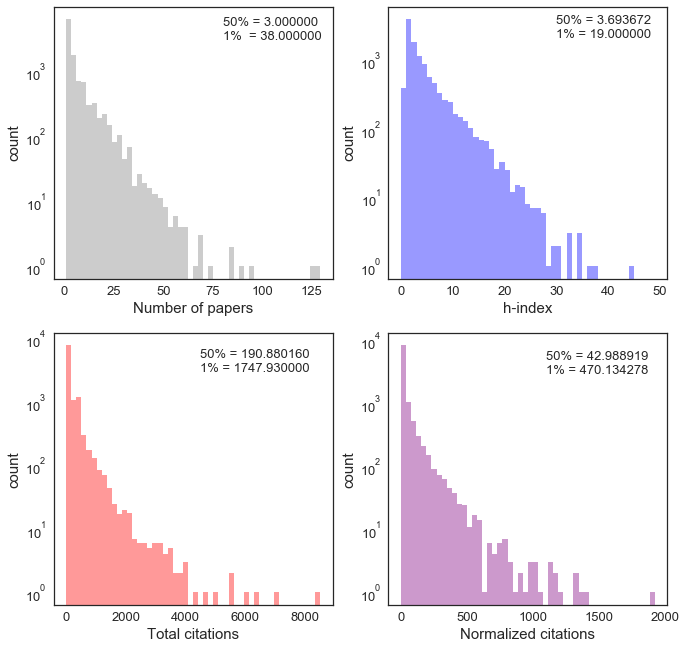

In [45]:
plt.figure(figsize=(11,11))
###
sns.set()
sns.set(font_scale = 1.3)
sns.set_style("white")
###
ax=plt.subplot(221)

g=sns.distplot(df_authors['n_papers'], kde=False,color="Grey");
g.set_yscale('log')
median= df_authors['n_papers'].median()
top= np.percentile(df_authors['n_papers'], 99.)
ax.text(80, 3000, '50%% = %f' % median +'\n1%%  = %f' % top, fontsize=13)
plt.xlabel('Number of papers', fontsize =15)
plt.ylabel('count', fontsize =15)
#
ax=plt.subplot(222)
median= df_authors['H_index'].mean()
top= np.percentile(df_authors['H_index'], 99.)
ax.text(30, 2100, '50%% = %f' % median +'\n1%% = %f' %top, fontsize=13)
g=sns.distplot(df_authors['H_index'],bins = range(50), kde=False,color="Blue");
plt.xlabel('h-index', fontsize =15)
plt.ylabel('count', fontsize =15)
g.set_yscale('log')
#
ax=plt.subplot(223)
median= df_authors['cites'].mean()
top= np.percentile(df_authors['cites'], 99.)
ax.text(4500, 3000, '50%% = %f' % median +'\n1%% = %f' %top, fontsize=13)
g=sns.distplot(df_authors['cites'], kde=False,color="Red");
g.set_yscale('log')
plt.xlabel('Total citations', fontsize =15)
plt.ylabel('count', fontsize =15)
#
ax=plt.subplot(224)
median= df_authors['cites_N'].mean()
top= np.percentile(df_authors['cites_N'], 99.)
ax.text(1100, 3000, '50%% = %f' % median +'\n1%% = %f' %top, fontsize=13)
g=sns.distplot(df_authors['cites_N'],kde=False,color="Purple");
g.set_yscale('log')
plt.xlabel('Normalized citations', fontsize =15)
plt.ylabel('count', fontsize =15)
###
plt.show()

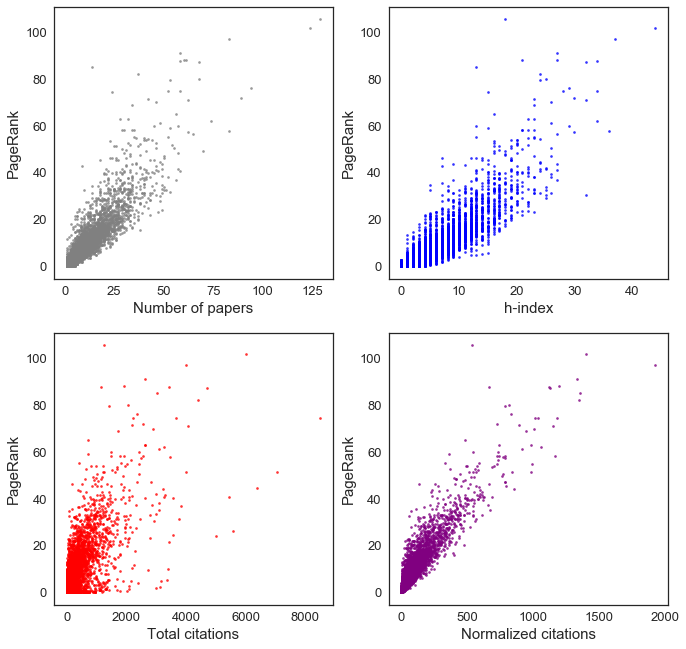

In [46]:
plt.figure(figsize=(11,11))
###
sns.set()
sns.set(font_scale = 1.3)
sns.set_style("white")
###
ax=plt.subplot(221)
g=sns.regplot(df_authors['n_papers'],df_authors['PageRank_N'],color="Grey", scatter_kws={'s':7}, fit_reg=False)
plt.xlabel('Number of papers', fontsize =15)
plt.ylabel('PageRank', fontsize =15)
#
ax=plt.subplot(222)
g=sns.regplot(df_authors['H_index'],df_authors['PageRank_N'],color="Blue", scatter_kws={'s':7}, fit_reg=False)
plt.xlabel('h-index', fontsize =15)
plt.ylabel('PageRank', fontsize =15)
#
ax=plt.subplot(223)
g=sns.regplot(df_authors['cites'],df_authors['PageRank_N'],color="Red", scatter_kws={'s':7}, fit_reg=False)
plt.xlabel('Total citations', fontsize =15)
plt.ylabel('PageRank', fontsize =15)
#
ax=plt.subplot(224)
g=sns.regplot(df_authors['cites_N'],df_authors['PageRank_N'],color="Purple", scatter_kws={'s':7}, fit_reg=False)
plt.xlabel('Normalized citations', fontsize =15)
plt.ylabel('PageRank', fontsize =15)
#
###
plt.show()

Known fact that h-index is correlated with square root of total number of citations

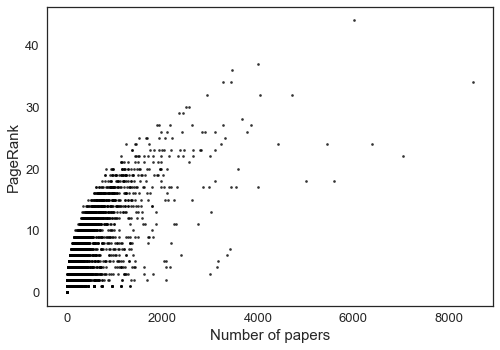

In [47]:
g=sns.regplot(df_authors['cites'],df_authors['H_index'],color="Black", scatter_kws={'s':7}, fit_reg=False)
plt.xlabel('Number of papers', fontsize =15)
plt.ylabel('PageRank', fontsize =15)
#
plt.show()

In [301]:
df_authors.sort_values('n_papers', ascending=0).head(5)

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
9644,1041414,"Azizi, Kazem",Azizi,129,18,2006,1239,537.350000,105.483969
8624,1045921,"Spannowsky, Michael",Spannowsky,124,44,2006,6010,1395.422665,101.688860
2774,1060297,"Nakayama, Kazunori",Nakayama,94,29,2006,2352,833.800000,76.122482
1173,1045471,"Kang, Zhongbo",Kang,89,30,2006,2552,722.111976,72.042379
1491,1058345,"Englert, Christoph",Englert,83,36,2008,3451,771.097733,57.955643


In [300]:
df_authors.sort_values('H_index', ascending=0).head(5)

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
8624,1045921,"Spannowsky, Michael",Spannowsky,124,44,2006,6010,1395.422665,101.688860
9056,1056063,"Staub, Florian",Staub,83,37,2008,3990,1922.604386,96.936994
1491,1058345,"Englert, Christoph",Englert,83,36,2008,3451,771.097733,57.955643
9300,1052537,"Dev, Paratma Sri Bhupal",Dev,74,34,2007,3269,1056.409587,61.951350
1515,1040388,"Frederix, Rikkert",Frederix,52,34,2006,8499,1179.729906,74.639826


In [297]:
df_authors.sort_values('cites', ascending=0).head(5)

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
1515,1040388,"Frederix, Rikkert",Frederix,52,34,2006,8499,1179.729906,74.639826
1472,1065036,"Mattelaer, Olivier",Mattelaer,33,22,2008,7035,983.028483,51.584908
7591,1054247,"Ubiali, Maria",Ubiali,48,24,2006,6390,508.056899,44.547788
8624,1045921,"Spannowsky, Michael",Spannowsky,124,44,2006,6010,1395.422665,101.688860
4108,1065776,"Zaro, Marco",Zaro,32,18,2010,5588,466.212780,26.115396


In [298]:
df_authors.sort_values('cites_N', ascending=0).head(5)

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
9056,1056063,"Staub, Florian",Staub,83,37,2008,3990,1922.604386,96.936994
8624,1045921,"Spannowsky, Michael",Spannowsky,124,44,2006,6010,1395.422665,101.688860
1987,1024768,"Ryu, Shinsei",Ryu,14,13,2006,3014,1350.750000,85.284567
7545,1058529,"Re, Emanuele",Re,37,24,2008,4414,1345.464034,82.098302
4839,1057171,"Hinterbichler, Kurt",Hinterbichler,58,27,2008,2624,1327.750000,91.153792


In [299]:
df_authors.sort_values('PageRank_N', ascending=0).head(5)

,authorID,name,lastname,n_papers,H_index,year0,cites,cites_N,PageRank_N
9644,1041414,"Azizi, Kazem",Azizi,129,18,2006,1239,537.350000,105.483969
8624,1045921,"Spannowsky, Michael",Spannowsky,124,44,2006,6010,1395.422665,101.688860
9056,1056063,"Staub, Florian",Staub,83,37,2008,3990,1922.604386,96.936994
4839,1057171,"Hinterbichler, Kurt",Hinterbichler,58,27,2008,2624,1327.750000,91.153792
3265,1034792,"Sheykhi, Ahmad",Sheykhi,61,27,2006,1918,1196.916667,88.010219


# Network graph

In [48]:
set_unique_authors_young =  set(unique_authors_young)
dict_cites=df_authors.set_index('authorID')['PageRank_N'].to_dict()
sorted_cites = sorted(dict_cites.items(), key=lambda x: x[1], reverse = True)
set_unique_authors_young_cited = set([sorted_cites[i][0]for i in range(200)])

#Create list of edges
authors_list = [ list(set(map(int,_)).intersection(set_unique_authors_young_cited)) for _ in data_HEP_young['authors']]
links = [list(itertools.combinations(_, 2)) for _ in authors_list]
links = [_ for sub in links for _ in sub]
links = [tuple(sorted((_[0],_[1]))) for _ in links] 
links_counter = dict(Counter(links))
sorted_links_counter = sorted(links_counter.items(), key=lambda x: x[1], reverse = True)

In [49]:
#Create graph
import networkx as nx
G_authors=nx.Graph()
G_authors.clear()
for i in set_unique_authors_young_cited:
    G_authors.add_node(i, nodesize = dict_cites[i] )
for link in links:
    G_authors.add_edge(link[0],link[1], edgewidth = links_counter[link]**1.5/5, edgeweight =links_counter[link]**2)
    
sizes = [G_authors.node[node]['nodesize']**3./100 for node in G_authors]
edgewidths = []
for (u,v,d) in G_authors.edges(data=True):
    edgewidths.append(np.array(d['edgewidth']))

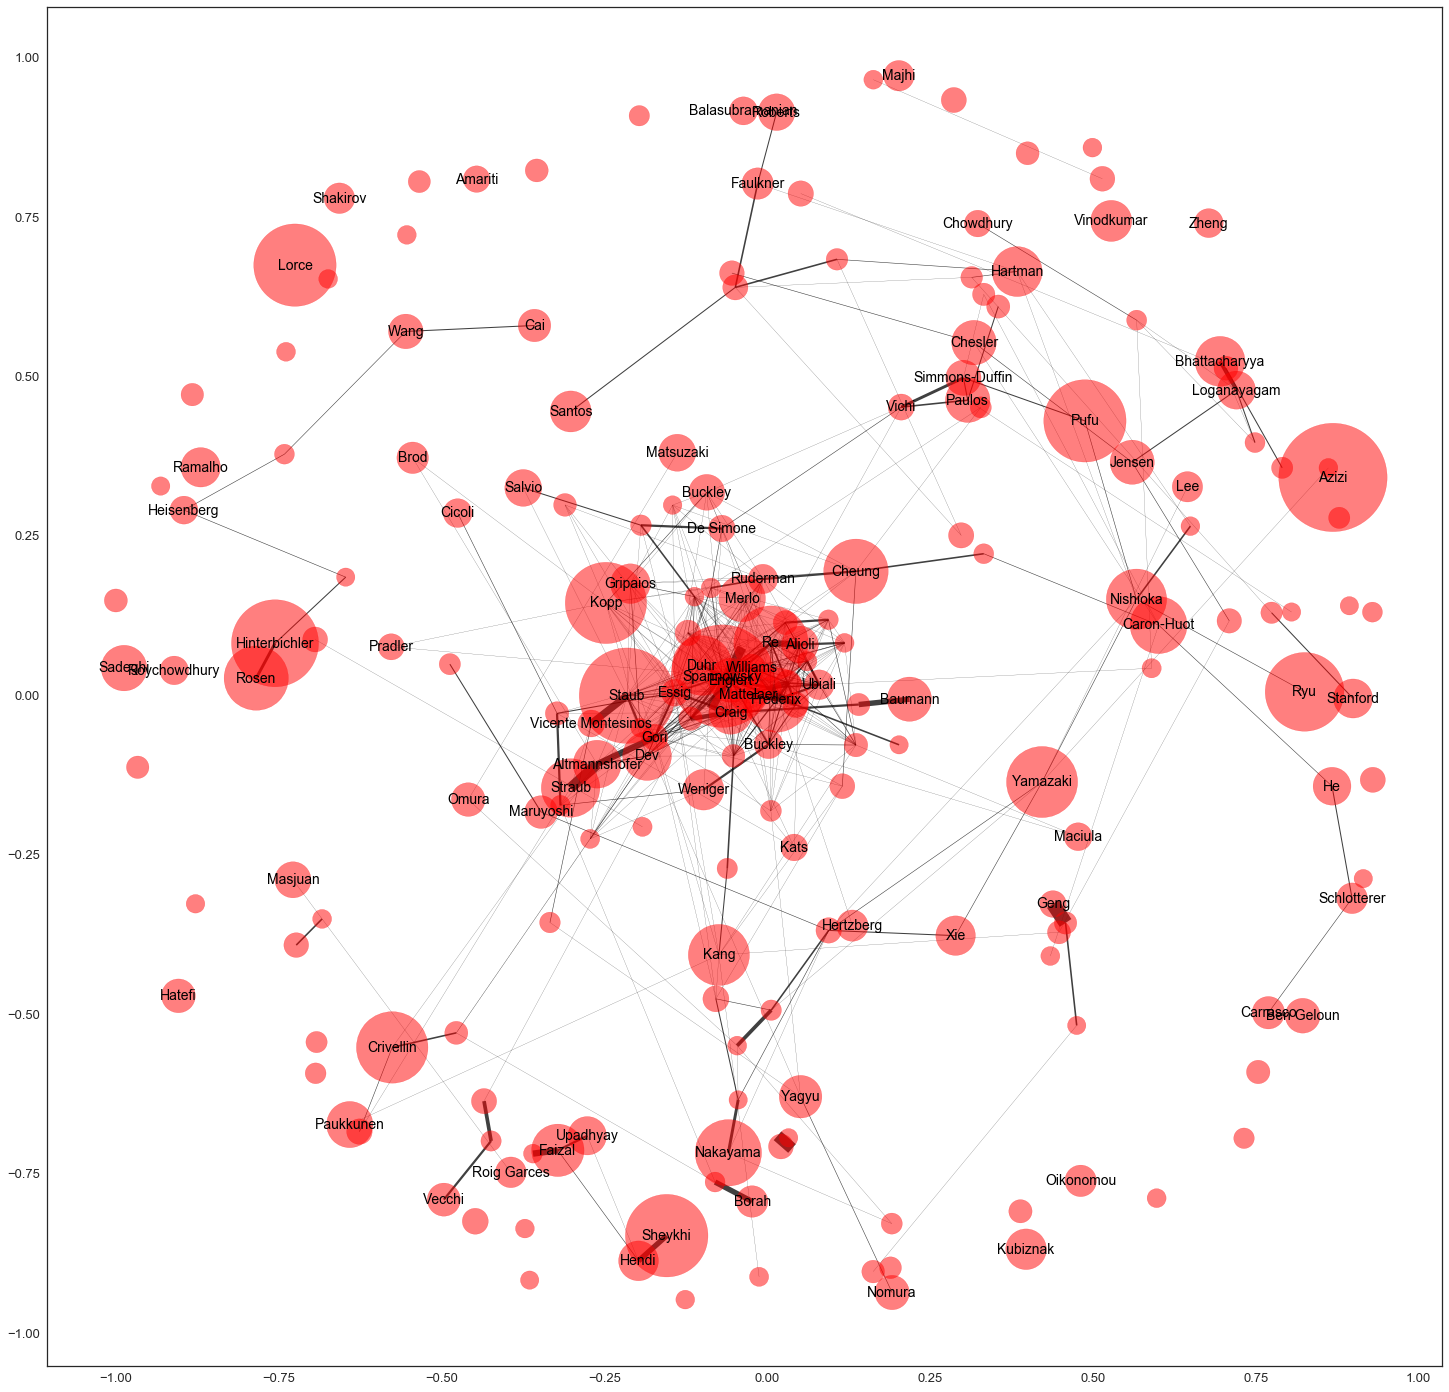

In [50]:
ids = dict(sorted_cites[:95]).keys()
dict_labels = df_authors[df_authors['authorID'].isin(ids)].set_index('authorID')['lastname'].to_dict()

plt.figure(figsize=(25,25))
pos=nx.spring_layout(G_authors, weight='edgeweight', k=.5, iterations=60)
nx.draw_networkx_edges(G_authors,pos,alpha=0.75,width=edgewidths, edge_color='k')
nx.draw_networkx_nodes(G_authors,pos,node_size=sizes,node_color='Red',alpha=0.5,with_labels=True)
nx.draw_networkx_labels(G_authors,pos,font_size = 14,
                           labels = dict_labels
                       )
plt.show()